In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### File path

In [91]:
pre_learning_path = "/content/drive/MyDrive/HPV/deidentified-pre-learning.xlsx"
post_learning_path = "/content/drive/MyDrive/HPV/deidentified-post-learning.xlsx"

In [92]:
df_pre = pd.read_excel(pre_learning_path)
df_post = pd.read_excel(post_learning_path)

### Correct anawers for the tests

All participants took the test twice: once at the beginning to establish a baseline and again after the learning process was completed using their designated tool.

In [93]:
correct_answers = {
    "What does HPV stand for?": "b) Human Papillomavirus",
    "How is HPV primarily transmitted?": "c) Through sexual contact",
    "Which cancers are commonly linked to HPV?": "b) Cervical cancer",
    "What can the HPV vaccine help prevent?": "b) Genital warts",
    "At what age is the HPV vaccine most recommended?": "b) 11–12 years",
    "Can HPV infections go away on their own?": "a) Yes, in most cases",
    "How many types of HPV are there?": "d) About 200",
    "How many HPV types are considered high-risk for causing cancer?": "b) 14",
    "Which test is commonly used to detect cervical cancer caused by HPV?": "b) Pap test",
    "Who can get HPV?": "d) Anyone, regardless of gender or age",
    "How effective is the HPV vaccine in preventing HPV-related cancers?": "c) >=90%",
    "Which of these groups is at higher risk for HPV complications?": "a) People with weakened immune systems",
    "How often should women get screened for cervical cancer?": "b) Every 3–5 years (depending on age and tests)",
    "Can men get HPV-related cancers?": "Yes",
    "How many doses of the HPV vaccine are recommended for children under age 15?": "b) 2 doses",
    "How many doses of the HPV vaccine are recommended for people over the age of 15?": "c) 3 doses",
    "What is the primary purpose of the HPV vaccine?": "b) To prevent HPV infections and related cancers",
    "Is it possible to have HPV without showing any symptoms?": "a) Yes, it’s common",
    "What percentage of sexually active people will get HPV at some point in their lives?": "d) 80%",
}

### Data Pre-processing

In [94]:
# Strip column names to remove extra spaces
df_pre.columns = df_pre.columns.str.strip()
df_post.columns = df_post.columns.str.strip()

In [95]:
question_columns = list(correct_answers.keys())


In [96]:
# Extract only the question columns
df_pre_filtered = df_pre[question_columns]
df_post_filtered = df_post[question_columns]

### View scores

In [97]:
# Function to calculate scores
def calculate_scores(df):
    return df.apply(lambda row: sum(row[q] == correct_answers[q] for q in question_columns), axis=1)


In [99]:
# Calculate scores for pre-learning and post-learning
df_pre["Score"] = calculate_scores(df_pre_filtered)
df_post["Score"] = calculate_scores(df_post_filtered)

In [100]:
# Compute average scores
avg_pre_score = df_pre["Score"].mean()
avg_post_score = df_post["Score"].mean()


<ipython-input-101-a587d682d293>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Score", data=df_combined, palette=["#3498db", "#e74c3c"], width=0.5)


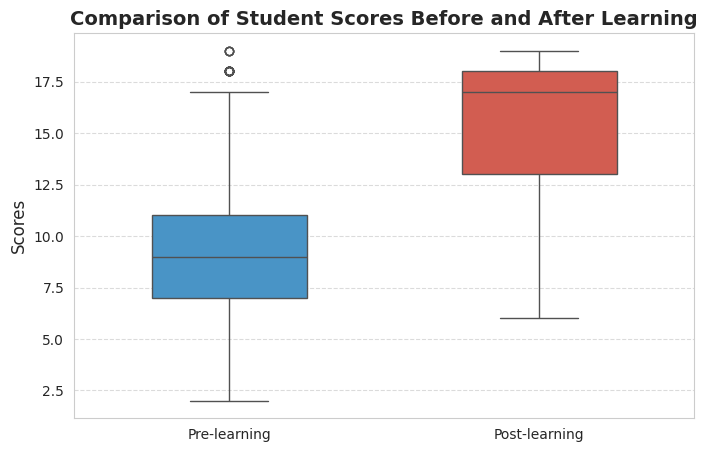

In [101]:
import seaborn as sns

# Combine Pre-learning and Post-learning scores into a long-format DataFrame
df_combined = pd.DataFrame({
    "Score": pd.concat([df_pre["Score"], df_post["Score"]], ignore_index=True),
    "Category": ["Pre-learning"] * len(df_pre) + ["Post-learning"] * len(df_post)
})

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="Score", data=df_combined, palette=["#3498db", "#e74c3c"], width=0.5)

plt.xlabel("")
plt.ylabel("Scores", fontsize=12)
plt.title("Comparison of Student Scores Before and After Learning", fontsize=14, fontweight="bold")


plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


In [102]:
# Print average scores
print(f"Average Pre-learning Score: {avg_pre_score}")
print(f"Average Post-learning Score: {avg_post_score}")

Average Pre-learning Score: 9.56637168141593
Average Post-learning Score: 15.427728613569322


### Group by the learning resource and compute average scores
In this section, we visualize the comparative scores of the participants before using their designated learning method, after using their learning method, and the performance of each individual learning group cohort.



In [103]:
resource_avg_scores = df_post.groupby("Which resources you have been assigned by your professor")["Score"].mean()

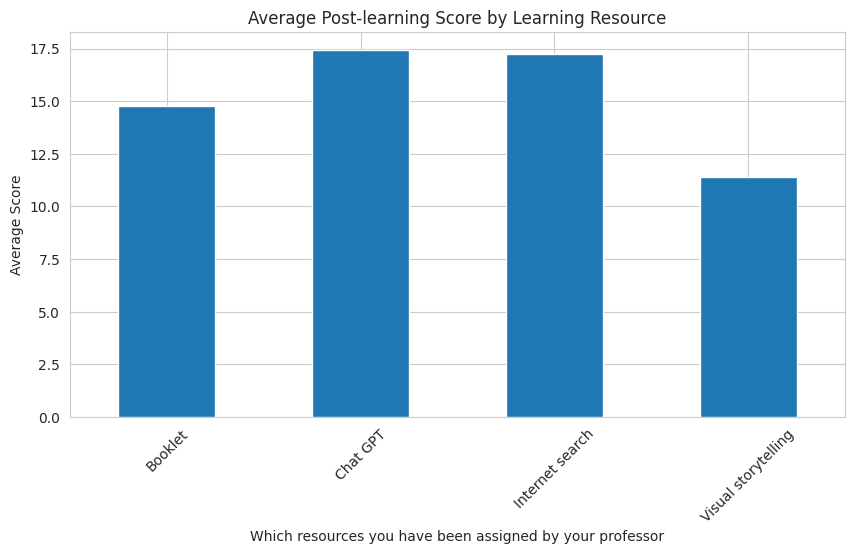

Which resources you have been assigned by your professor
Booklet                14.755556
Chat GPT               17.418605
Internet search        17.258065
Visual storytelling    11.414286
Name: Score, dtype: float64


In [104]:
# Plot the average scores for different learning tools
plt.figure(figsize=(10, 5))
resource_avg_scores.plot(kind="bar")
plt.ylabel("Average Score")
plt.title("Average Post-learning Score by Learning Resource")
plt.xticks(rotation=45)
plt.show()

print(resource_avg_scores)

<ipython-input-105-00b55f1c84af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Learning Method", y="Score", data=df_scores, palette="Set2", width=0.5, showfliers=False)


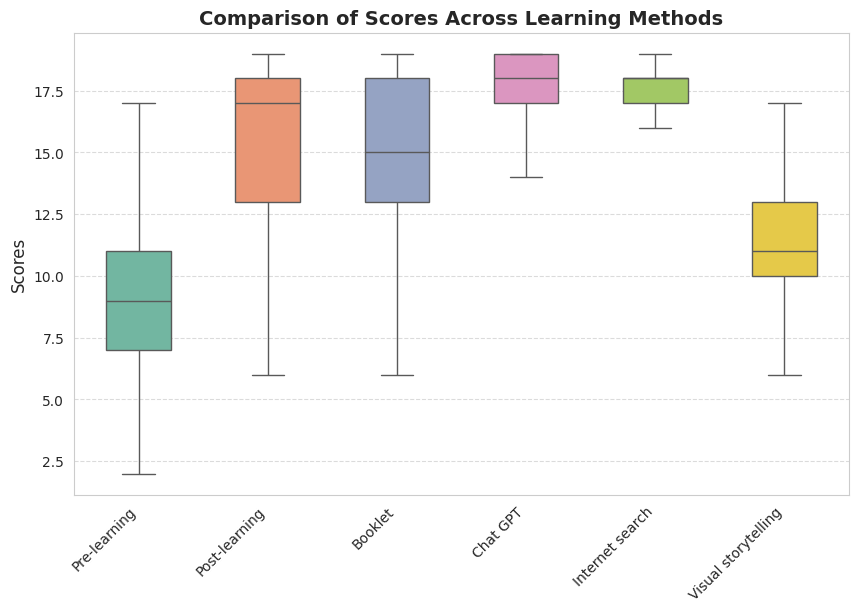

In [105]:
import seaborn as sns

score_data = []

score_data.extend([(score, "Pre-learning") for score in df_pre["Score"]])

score_data.extend([(score, "Post-learning") for score in df_post["Score"]])

for resource, group in df_post.groupby("Which resources you have been assigned by your professor"):
    score_data.extend([(score, resource) for score in group["Score"]])

df_scores = pd.DataFrame(score_data, columns=["Score", "Learning Method"])

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Learning Method", y="Score", data=df_scores, palette="Set2", width=0.5, showfliers=False)

plt.xlabel("")
plt.ylabel("Scores", fontsize=12)
plt.title("Comparison of Scores Across Learning Methods", fontsize=14, fontweight="bold")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


**Percentage of correct answers by each cohort**

Q1: What does HPV stand for?\
Q2: How is HPV primarily transmitted?\
Q3: Which cancers are commonly linked to HPV?\
Q4: What can the HPV vaccine help prevent?\
Q5: At what age is the HPV vaccine most recommended?\
Q6: Can HPV infections go away on their own?\
Q7: How many types of HPV are there?\
Q8: How many HPV types are considered high-risk for causing cancer?\
Q9: Which test is commonly used to detect cervical cancer caused by HPV?\
Q10: Who can get HPV?\
Q11: How effective is the HPV vaccine in preventing HPV-related cancers?\
Q12: Which of these groups is at higher risk for HPV complications?\
Q13: How often should women get screened for cervical cancer?\
Q14: Can men get HPV-related cancers?\
Q15: How many doses of the HPV vaccine are recommended for children under age 15?\
Q16: How many doses of the HPV vaccine are recommended for people over the age of 15?\
Q17: What is the primary purpose of the HPV vaccine?\
Q18: Is it possible to have HPV without showing any symptoms?\
Q19: What percentage of sexually active people will get HPV at some point in their lives?\
</br>
**In the figure:**\
1: Pre-Leaning\
2: Post-Leanring\
3: Booklet\
4: Chat GPT\
5: Internet Search\
6: Visual Storytelling

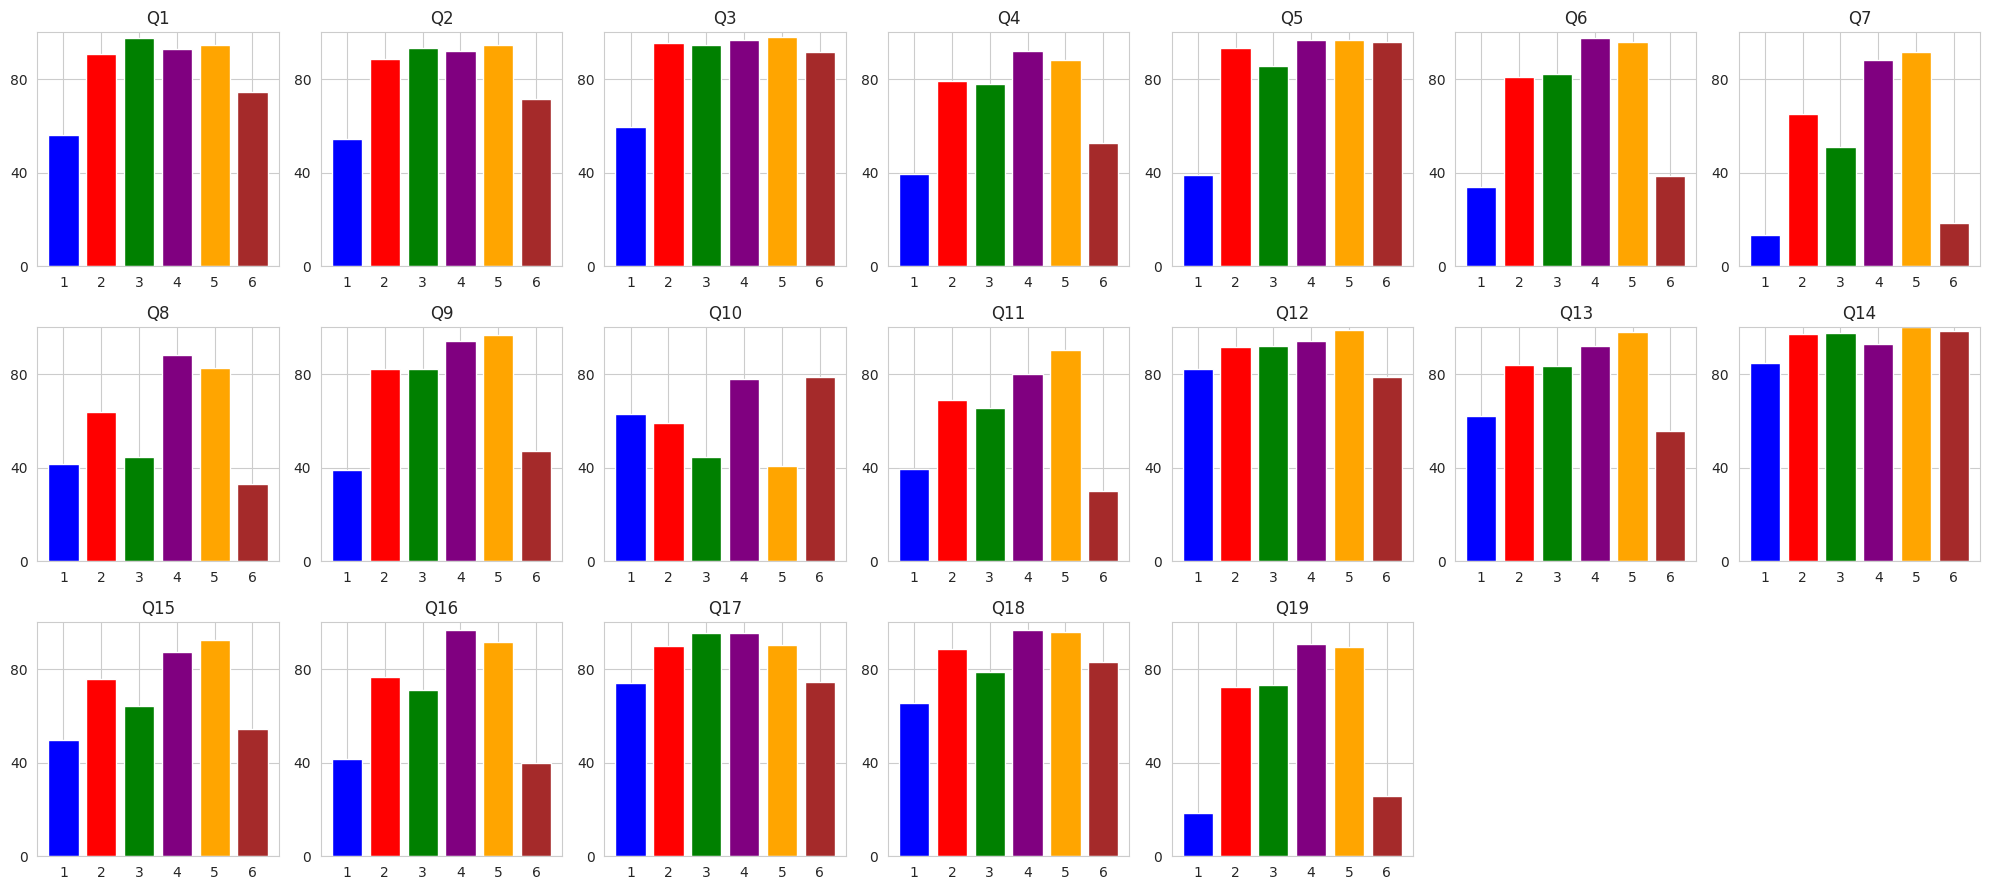

In [106]:
pre_correct = {q: (df_pre[q] == correct_answers[q]).mean() * 100 for q in question_columns}
post_correct = {q: (df_post[q] == correct_answers[q]).mean() * 100 for q in question_columns}
resource_correct = {r: {q: (g[q] == correct_answers[q]).mean() * 100 for q in question_columns}
                   for r, g in df_post.groupby("Which resources you have been assigned by your professor")}

df_resource = pd.DataFrame(resource_correct)

fig, axes = plt.subplots((len(question_columns) + 5) // 7, 7, figsize=(20, ((len(question_columns) + 5) // 7) * 3))
axes = axes.flatten()
colors = ["blue", "red", "green", "purple", "orange", "brown"]

q_map = {q: str(i + 1) for i, q in enumerate(question_columns)}
bar_map = {n: str(i + 1) for i, n in enumerate(["Pre-learning", "Post-learning"] + list(df_resource.columns))}

for i, q in enumerate(question_columns):
    ax = axes[i]
    data = [pre_correct[q], post_correct[q]] + [df_resource.loc[q, r] for r in df_resource.columns]
    ax.bar(bar_map.values(), data, color=colors[:len(data)])
    ax.set_title(f"Q{q_map[q]}")
    ax.set_ylim(0, 100)
    ax.set_yticks(range(0, 101, 40))

for i in range(len(question_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Evaluating the Effectiveness of Learning Methods on Knowledge Improvement

This analysis evaluates the impact of different learning methods on participants' knowledge improvement. It compares pre-learning and post-learning performance to determine whether learning interventions were effective.

In [107]:
import scipy.stats as stats

# Perform statistical tests (t-test) comparing pre-learning vs post-learning and each post-learning tool

results = []

for question in question_columns:
    pre_correct_percentage = (df_pre[question] == correct_answers[question]).mean() * 100
    post_correct_percentage = (df_post[question] == correct_answers[question]).mean() * 100

    pre_scores = (df_pre[question] == correct_answers[question]).astype(int)
    post_scores = (df_post[question] == correct_answers[question]).astype(int)

    row_data = {
        "Question": question,
        "Pre-learning Correct (%)": pre_correct_percentage,
        "Post-learning Correct (%)": post_correct_percentage
    }

    t_stat, p_value = stats.ttest_ind(pre_scores, post_scores, equal_var=False, nan_policy='omit')
    row_data["Post-learning T-Statistic"] = t_stat
    row_data["Post-learning P-Value"] = p_value

    for resource, group in df_post.groupby("Which resources you have been assigned by your professor"):
        resource_correct_percentage = (group[question] == correct_answers[question]).mean() * 100
        resource_scores = (group[question] == correct_answers[question]).astype(int)

        t_stat, p_value = stats.ttest_ind(pre_scores, resource_scores, equal_var=False, nan_policy='omit')

        row_data[f"{resource} Correct (%)"] = resource_correct_percentage
        row_data[f"{resource} T-Statistic"] = t_stat
        row_data[f"{resource} P-Value"] = p_value

    results.append(row_data)

df_stats = pd.DataFrame(results)

df_stats


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Question,Pre-learning Correct (%),Post-learning Correct (%),Post-learning T-Statistic,Post-learning P-Value,Booklet Correct (%),Booklet T-Statistic,Booklet P-Value,Chat GPT Correct (%),Chat GPT T-Statistic,Chat GPT P-Value,Internet search Correct (%),Internet search T-Statistic,Internet search P-Value,Visual storytelling Correct (%),Visual storytelling T-Statistic,Visual storytelling P-Value
0,What does HPV stand for?,56.047198,90.855457,-11.149657,3.885615e-26,97.777778,-13.378450,2.792949e-34,93.023256,-9.571601,7.965921e-19,94.623656,-10.774906,1.901363e-23,74.285714,-3.084089,2.589539e-03
1,How is HPV primarily transmitted?,54.277286,88.790560,-10.760745,1.023565e-24,93.333333,-10.315990,1.853970e-21,91.860465,-9.355301,5.707267e-18,94.623656,-11.245574,3.980903e-25,71.428571,-2.822731,5.686284e-03
2,Which cancers are commonly linked to HPV?,59.587021,95.280236,-12.275210,3.702686e-30,94.444444,-9.660307,1.697017e-19,96.511628,-11.090256,7.609975e-25,97.849462,-12.472010,1.147778e-30,91.428571,-7.406592,5.860764e-12
3,What can the HPV vaccine help prevent?,39.233038,79.056047,-11.518913,4.382283e-28,77.777778,-7.491319,4.366877e-12,91.860465,-13.218985,2.862971e-30,88.172043,-11.412287,5.598942e-24,52.857143,-2.073633,4.074108e-02
4,At what age is the HPV vaccine most recommended?,38.938053,93.510324,-18.365201,5.936185e-58,85.555556,-10.192244,1.007235e-19,96.511628,-17.362856,1.150167e-49,96.774194,-17.910456,4.098797e-53,95.714286,-15.759382,1.453194e-39
5,Can HPV infections go away on their own?,33.923304,80.825959,-14.004309,3.652086e-39,82.222222,-10.058850,6.248546e-19,97.674419,-20.900179,2.672429e-66,95.698925,-18.537136,4.002145e-54,38.571429,-0.726174,4.694718e-01
6,How many types of HPV are there?,13.569322,64.896755,-16.063575,1.010371e-48,51.111111,-6.684114,9.476714e-10,88.372093,-18.963837,2.974705e-40,91.397849,-22.452489,2.755807e-53,18.571429,-0.992778,3.234191e-01
7,How many HPV types are considered high-risk fo...,41.592920,63.716814,-5.907138,5.517039e-09,44.444444,-0.482475,6.302293e-01,88.372093,-10.654619,2.977906e-21,82.795699,-8.653601,2.309243e-15,32.857143,1.395981,1.657380e-01
8,Which test is commonly used to detect cervical...,38.938053,82.005900,-12.755503,2.280763e-33,82.222222,-8.936769,5.827758e-16,94.186047,-15.049596,4.158368e-38,96.774194,-17.910456,4.098797e-53,47.142857,-1.249073,2.146215e-01
9,Who can get HPV?,62.831858,58.997050,1.022479,3.069202e-01,44.444444,3.123590,2.181801e-03,77.906977,-2.892718,4.393911e-03,40.860215,3.814658,2.017158e-04,78.571429,-2.812864,5.801972e-03


**Consolidated comparison between pre- and post-learning HPV knowledge level**

In [108]:
import scipy.stats as stats

# Ensure all lists have the same length before creating the DataFrame
total_results = {
    "Category": ["Pre-learning", "Post-learning", "Booklet", "Internet search", "Chat GPT", "Visual storytelling"],
    "Correct Percentage": [],
    "T-Statistic": [],
    "P-Value": []
}

pre_correct_percentage = sum((df_pre[question] == correct_answers[question]).mean() * 100 for question in question_columns) / len(question_columns)
total_results["Correct Percentage"].append(pre_correct_percentage)
total_results["T-Statistic"].append(None)
total_results["P-Value"].append(None)

# Compute total correct percentage for post-learning
post_correct_percentage = sum((df_post[question] == correct_answers[question]).mean() * 100 for question in question_columns) / len(question_columns)
total_results["Correct Percentage"].append(post_correct_percentage)

# Perform t-test for pre-learning vs post-learning
pre_scores_total = pd.concat([(df_pre[question] == correct_answers[question]).astype(int) for question in question_columns], axis=1).values.flatten()
post_scores_total = pd.concat([(df_post[question] == correct_answers[question]).astype(int) for question in question_columns], axis=1).values.flatten()

t_stat, p_value = stats.ttest_ind(pre_scores_total, post_scores_total, equal_var=False, nan_policy='omit')
total_results["T-Statistic"].append(t_stat)
total_results["P-Value"].append(p_value)

# Compute total correct percentage for each learning tool
grouped_post = df_post.groupby("Which resources you have been assigned by your professor")

for resource in ["Booklet", "Internet search", "Chat GPT", "Visual storytelling"]:
    if resource in grouped_post.groups:
        group = grouped_post.get_group(resource)
        resource_correct_percentage = sum((group[question] == correct_answers[question]).mean() * 100 for question in question_columns) / len(question_columns)
        resource_scores_total = pd.concat([(group[question] == correct_answers[question]).astype(int) for question in question_columns], axis=1).values.flatten()

        t_stat, p_value = stats.ttest_ind(pre_scores_total, resource_scores_total, equal_var=False, nan_policy='omit')
    else:
        resource_correct_percentage = None  # Handle missing groups
        t_stat, p_value = None, None  # Handle missing groups

    total_results["Correct Percentage"].append(resource_correct_percentage)
    total_results["T-Statistic"].append(t_stat)
    total_results["P-Value"].append(p_value)

df_total_stats = pd.DataFrame(total_results)

df_total_stats


,Category,Correct Percentage,T-Statistic,P-Value
0,Pre-learning,50.349325,NaN,NaN
1,Post-learning,81.198572,-39.014154,0.000000e+00
2,Booklet,77.660819,-23.055083,8.526335e-109
3,Internet search,90.831919,-43.660404,0.000000e+00
4,Chat GPT,91.676867,-44.683208,0.000000e+00
5,Visual storytelling,60.075188,-6.567763,6.536875e-11


### Best perfoming tool

In [109]:
import itertools

# Store performance improvements
performance_results = []

# Calculate performance improvement for each learning tool compared to post-learning
tool_performance = {}

for resource in ["Booklet", "Internet search", "Chat GPT", "Visual storytelling"]:
    if resource in grouped_post.groups:
        group = grouped_post.get_group(resource)

        resource_correct_total = sum((group[question] == correct_answers[question]).sum() for question in question_columns)
        resource_performance = resource_correct_total / (len(group) * len(question_columns)) * 100

        tool_performance[resource] = resource_performance

df_tool_performance = pd.DataFrame(tool_performance.items(), columns=["Tool", "Correct Percentage"])

delta_results = []

for (tool1, perf1), (tool2, perf2) in itertools.combinations(tool_performance.items(), 2):
    group1 = grouped_post.get_group(tool1)
    group2 = grouped_post.get_group(tool2)

    scores1 = pd.concat([(group1[question] == correct_answers[question]).astype(int) for question in question_columns], axis=1).values.flatten()
    scores2 = pd.concat([(group2[question] == correct_answers[question]).astype(int) for question in question_columns], axis=1).values.flatten()

    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False, nan_policy='omit')

    delta_results.append([tool1, tool2, perf1 - perf2, t_stat, p_value])

df_delta_comparison = pd.DataFrame(delta_results, columns=["Tool 1", "Tool 2", "Performance Delta", "T-Statistic", "P-Value"])

best_tool = df_tool_performance.loc[df_tool_performance["Correct Percentage"].idxmax()]

print("Performance Delta Comparison Across Learning Tools:\n")
df_delta_comparison



Performance Delta Comparison Across Learning Tools:



,Tool 1,Tool 2,Performance Delta,T-Statistic,P-Value
0,Booklet,Internet search,-13.171100,-10.802186,1.023319e-26
1,Booklet,Chat GPT,-14.016048,-11.511772,4.912830e-30
2,Booklet,Visual storytelling,17.585631,10.472321,3.633807e-25
3,Internet search,Chat GPT,-0.844948,-0.872049,3.832431e-01
4,Internet search,Visual storytelling,30.756731,20.385772,3.994303e-84
5,Chat GPT,Visual storytelling,31.601679,20.965559,2.253540e-88


In [110]:
print("\nBest Performing Tool:\n")
print(best_tool)


Best Performing Tool:

Tool                   Chat GPT
Correct Percentage    91.676867
Name: 2, dtype: object


### Vaccination intent
Assessing the Increase in Vaccination Intent Across Participant Cohorts After Learning Intervention

In [111]:
# Extract relevant columns for vaccination intention comparison
pre_vaccination = df_pre["Will you get vaccinated for HPV?"].replace({"Yes": 1, "No": 0})
post_vaccination = df_post["Will you get vaccinated for HPV?"].replace({"Yes": 1, "No": 0})

# Perform t-test for pre vs post vaccination intention
t_stat, p_value = stats.ttest_ind(pre_vaccination, post_vaccination, equal_var=False, nan_policy='omit')

# Store results
vaccination_results = {
    "Category": ["Pre-learning", "Post-learning"],
    "Vaccination Intent (%)": [pre_vaccination.mean() * 100, post_vaccination.mean() * 100],
    "T-Statistic": [None, t_stat],
    "P-Value": [None, p_value]
}

# Compare each learning tool's vaccination intent
grouped_post = df_post.groupby("Which resources you have been assigned by your professor")

for resource in ["Booklet", "Internet search", "Chat GPT", "Visual storytelling"]:
    if resource in grouped_post.groups:
        group = grouped_post.get_group(resource)
        resource_vaccination = group["Will you get vaccinated for HPV?"].replace({"Yes": 1, "No": 0})

        t_stat, p_value = stats.ttest_ind(pre_vaccination, resource_vaccination, equal_var=False, nan_policy='omit')
        vaccination_intent = resource_vaccination.mean() * 100
    else:
        vaccination_intent = None
        t_stat, p_value = None, None  # Handle missing groups

    vaccination_results["Category"].append(resource)
    vaccination_results["Vaccination Intent (%)"].append(vaccination_intent)
    vaccination_results["T-Statistic"].append(t_stat)
    vaccination_results["P-Value"].append(p_value)

# Convert to DataFrame
df_vaccination_comparison = pd.DataFrame(vaccination_results)

# Display the statistical results
df_vaccination_comparison


<ipython-input-111-306e5a066ede>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pre_vaccination = df_pre["Will you get vaccinated for HPV?"].replace({"Yes": 1, "No": 0})
<ipython-input-111-306e5a066ede>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  post_vaccination = df_post["Will you get vaccinated for HPV?"].replace({"Yes": 1, "No": 0})
<ipython-input-111-306e5a066ede>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

,Category,Vaccination Intent (%),T-Statistic,P-Value
0,Pre-learning,8.554572,NaN,NaN
1,Post-learning,61.356932,-17.287384,1.333964e-53
2,Booklet,48.888889,-7.316547,5.497122e-11
3,Internet search,82.795699,-17.598073,3.912227e-35
4,Chat GPT,50.000000,-7.358133,5.593852e-11
5,Visual storytelling,62.857143,-9.031561,8.720496e-14


In [112]:
# Compute performance delta compared to pre-learning vaccination intent
df_vaccination_comparison["Delta from Pre-learning (%)"] = df_vaccination_comparison["Vaccination Intent (%)"] - df_vaccination_comparison["Vaccination Intent (%)"].iloc[0]

# Identify the best-performing tool for increasing vaccination intent
df_vaccination_comparison_filtered = df_vaccination_comparison.dropna(subset=["Vaccination Intent (%)"])
best_tool = df_vaccination_comparison_filtered.loc[df_vaccination_comparison_filtered["Vaccination Intent (%)"].idxmax()]

# Display performance comparison and best tool
print("Vaccination Intent Comparison Across Learning Tools:\n")
df_vaccination_comparison



Vaccination Intent Comparison Across Learning Tools:



,Category,Vaccination Intent (%),T-Statistic,P-Value,Delta from Pre-learning (%)
0,Pre-learning,8.554572,NaN,NaN,0.000000
1,Post-learning,61.356932,-17.287384,1.333964e-53,52.802360
2,Booklet,48.888889,-7.316547,5.497122e-11,40.334317
3,Internet search,82.795699,-17.598073,3.912227e-35,74.241127
4,Chat GPT,50.000000,-7.358133,5.593852e-11,41.445428
5,Visual storytelling,62.857143,-9.031561,8.720496e-14,54.302571


In [117]:
# Define relevant columns
pre_vaccination_col = "Will you get vaccinated for HPV?"
post_vaccination_col = "Will you get vaccinated for HPV?"
participant_id = "participant_id"
resource_col = "Which resources you have been assigned by your professor"

# Convert responses to lowercase for consistency
df_pre[pre_vaccination_col] = df_pre[pre_vaccination_col].str.lower().str.strip()
df_post[post_vaccination_col] = df_post[post_vaccination_col].str.lower().str.strip()

# Merge datasets on Email Address to track individual changes, specifying suffixes
df_merged = df_post[[participant_id, post_vaccination_col, resource_col]].merge(
    df_pre[[participant_id, pre_vaccination_col]],
    on=participant_id,
    how="inner",
    suffixes=('_post', '_pre')  # Add suffixes to distinguish columns
)

# Compute vaccination intent percentages for each learning tool (only matching participants)
tool_vaccination_results = []
for resource, group in df_merged.groupby(resource_col):
    # Subset people who used this tool and were also in the pre-learning dataset
    # Access pre_vaccination_col and post_vaccination_col using the new column names with suffixes
    pre_vaccinated = group[pre_vaccination_col + '_pre'].value_counts().get("yes", 0)
    pre_vaccination_percentage_tool = (pre_vaccinated / len(group)) * 100

    post_vaccinated = group[post_vaccination_col + '_post'].value_counts().get("yes", 0)
    post_vaccination_percentage_tool = (post_vaccinated / len(group)) * 100

    # Compute delta
    delta = post_vaccination_percentage_tool - pre_vaccination_percentage_tool

    # Perform statistical test (paired t-test)
    pre_binary = group[pre_vaccination_col + '_pre'].map({"yes": 1, "no": 0}).dropna()
    post_binary = group[post_vaccination_col + '_post'].map({"yes": 1, "no": 0}).dropna()

    if len(pre_binary) > 1 and len(post_binary) > 1:
        t_stat, p_value = stats.ttest_rel(pre_binary, post_binary, nan_policy='omit')
    else:
        t_stat, p_value = None, None  # Not enough data for statistical test

    tool_vaccination_results.append([resource, pre_vaccination_percentage_tool, post_vaccination_percentage_tool, t_stat, p_value, delta])

# Create a DataFrame with the results
df_vaccination_tools = pd.DataFrame(
    tool_vaccination_results,
    columns=["Category", "Pre-learning Vaccination Intent (%)", "Post-learning Vaccination Intent (%)", "T-Statistic", "P-Value", "Delta from Pre-learning (%)"]
)

# Remove the post-learning total since we are only considering subsets
df_vaccination_tools = df_vaccination_tools[df_vaccination_tools["Category"] != "Post-learning"]

# Display the updated table
df_vaccination_tools

,Category,Pre-learning Vaccination Intent (%),Post-learning Vaccination Intent (%),T-Statistic,P-Value,Delta from Pre-learning (%)
0,Booklet,13.333333,48.888889,-6.690462,1.908595e-09,35.555556
1,Chat GPT,5.813953,50.000000,-7.841746,1.177298e-11,44.186047
2,Internet search,8.602151,82.795699,-15.420491,3.043272e-27,74.193548
3,Visual storytelling,5.714286,62.857143,-9.591663,2.528053e-14,57.142857


In [118]:
print("\nBest Performing Tool for Increasing Vaccination Intent:\n")
print(best_tool)


Best Performing Tool for Increasing Vaccination Intent:

Category                       Internet search
Vaccination Intent (%)               82.795699
T-Statistic                         -17.598073
P-Value                                    0.0
Delta from Pre-learning (%)          74.241127
Name: 3, dtype: object


### Perceived Ease of Use and Usefulness of Learning Tools for HPV Education

Here we are evaluating the intervention methods based on the following citeira:\
1. Ease of Use
2. Usefulness
3. Engagement
4. Independence
5. Overall


In [119]:
import pandas as pd
import scipy.stats as stats

# Load the quality dataset
file_path = "/content/drive/MyDrive/HPV/quality.xlsx"
df_quality = pd.read_excel(file_path)

# Convert Likert-scale columns to numeric (forcing errors to NaN)
likert_columns = df_quality.columns[2:]  # Skip non-numeric columns
df_quality[likert_columns] = df_quality[likert_columns].apply(pd.to_numeric, errors='coerce')

# Initialize dictionary for storing grouped statistics
grouped_stats = {}

# Compute statistics for overall data
overall_stats = df_quality[likert_columns].describe().T
overall_stats["Positive Impression (%)"] = (df_quality[likert_columns] >= 4).mean() * 100
overall_stats.insert(0, "Category", "Overall")  # Add category column for merging
grouped_stats["Overall"] = overall_stats

# Compute statistics for each learning tool
grouped_quality = df_quality.groupby("Which resources you have been assigned by your professor")

for resource in ["Booklet", "Internet search", "Chat GPT", "Visual storytelling"]:
    if resource in grouped_quality.groups:
        group = grouped_quality.get_group(resource)
        group_numeric = group[likert_columns].apply(pd.to_numeric, errors='coerce')

        # Compute descriptive statistics
        resource_stats = group_numeric.describe().T
        resource_stats["Positive Impression (%)"] = (group_numeric >= 4).mean() * 100
        resource_stats.insert(0, "Category", resource)  # Add category column for merging

        grouped_stats[resource] = resource_stats

# Merge all grouped statistics into a single DataFrame
df_grouped_stats = pd.concat(grouped_stats, keys=grouped_stats.keys()).reset_index(level=1)
df_grouped_stats = df_grouped_stats.rename(columns={"level_1": "Question", "level_0": "Category"})

# Perform t-tests for likelihood of positive impressions
p_values_results = {"Question": likert_columns}

for resource in ["Booklet", "Internet search", "Chat GPT", "Visual storytelling"]:
    p_values = []
    if resource in grouped_quality.groups:
        group = grouped_quality.get_group(resource)
        group_numeric = group[likert_columns].apply(pd.to_numeric, errors='coerce')

        for column in likert_columns:
            overall_positive = (df_quality[column] >= 4).astype(int)
            resource_positive = (group_numeric[column] >= 4).astype(int)

            if len(resource_positive) > 1 and len(overall_positive) > 1:
                t_stat, p_value = stats.ttest_ind(overall_positive, resource_positive, equal_var=False, nan_policy='omit')
            else:
                p_value = None  # Not enough data for t-test

            p_values.append(p_value)

    else:
        p_values = [None] * len(likert_columns)  # Handle missing groups

    p_values_results[resource] = p_values

# Convert p-values to DataFrame and structure correctly for merging
df_p_values = pd.DataFrame(p_values_results)
df_p_values = df_p_values.melt(id_vars=["Question"], var_name="Category", value_name="P-Value")

# Ensure proper column names before merging
df_p_values["Question"] = df_p_values["Question"].astype(str)
df_p_values["Category"] = df_p_values["Category"].astype(str)
df_grouped_stats["Question"] = df_grouped_stats["Question"].astype(str)
df_grouped_stats["Category"] = df_grouped_stats["Category"].astype(str)

# Merge grouped statistics with p-values on "Question" and "Category"
df_final = df_grouped_stats.merge(df_p_values, on=["Question", "Category"], how="left")

# Display the final table
df_final



,Question,Category,count,mean,std,min,25%,50%,75%,max,Positive Impression (%),P-Value
0,What were your knowledge level about HPV befor...,Overall,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,I found it easy to search for specific informa...,Overall,339.0,3.861357,1.044121,1.0,3.0,4.0,5.00,5.0,72.271386,NaN
2,"The resource was well-organized, making it sim...",Overall,339.0,3.672566,1.091461,1.0,3.0,4.0,4.00,5.0,65.781711,NaN
3,The resource helped me find information quickl...,Overall,339.0,3.882006,1.086877,1.0,3.0,4.0,5.00,5.0,73.746313,NaN
4,I was able to learn independently using this r...,Overall,339.0,3.805310,1.022166,1.0,3.0,4.0,5.00,5.0,69.911504,NaN
5,The resource improved my understanding of HPV ...,Overall,339.0,3.991150,1.004389,1.0,4.0,4.0,5.00,5.0,81.415929,NaN
6,The resource answered most or all of my questi...,Overall,339.0,3.728614,1.075593,1.0,3.0,4.0,4.00,5.0,67.846608,NaN
7,The resource provided relevant and accurate in...,Overall,339.0,3.887906,0.932231,1.0,3.5,4.0,4.00,5.0,74.926254,NaN
8,The resource motivated me to learn more about ...,Overall,339.0,3.952802,0.980950,1.0,4.0,4.0,5.00,5.0,76.401180,NaN
9,The resource increased my interest in getting ...,Overall,339.0,3.932153,1.008015,1.0,3.0,4.0,5.00,5.0,73.746313,NaN


In [120]:
df_final.to_csv('/content/drive/MyDrive/HPV/quality-feedback.csv', index=False)

<ipython-input-121-60138d46601e>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_avg_melted,


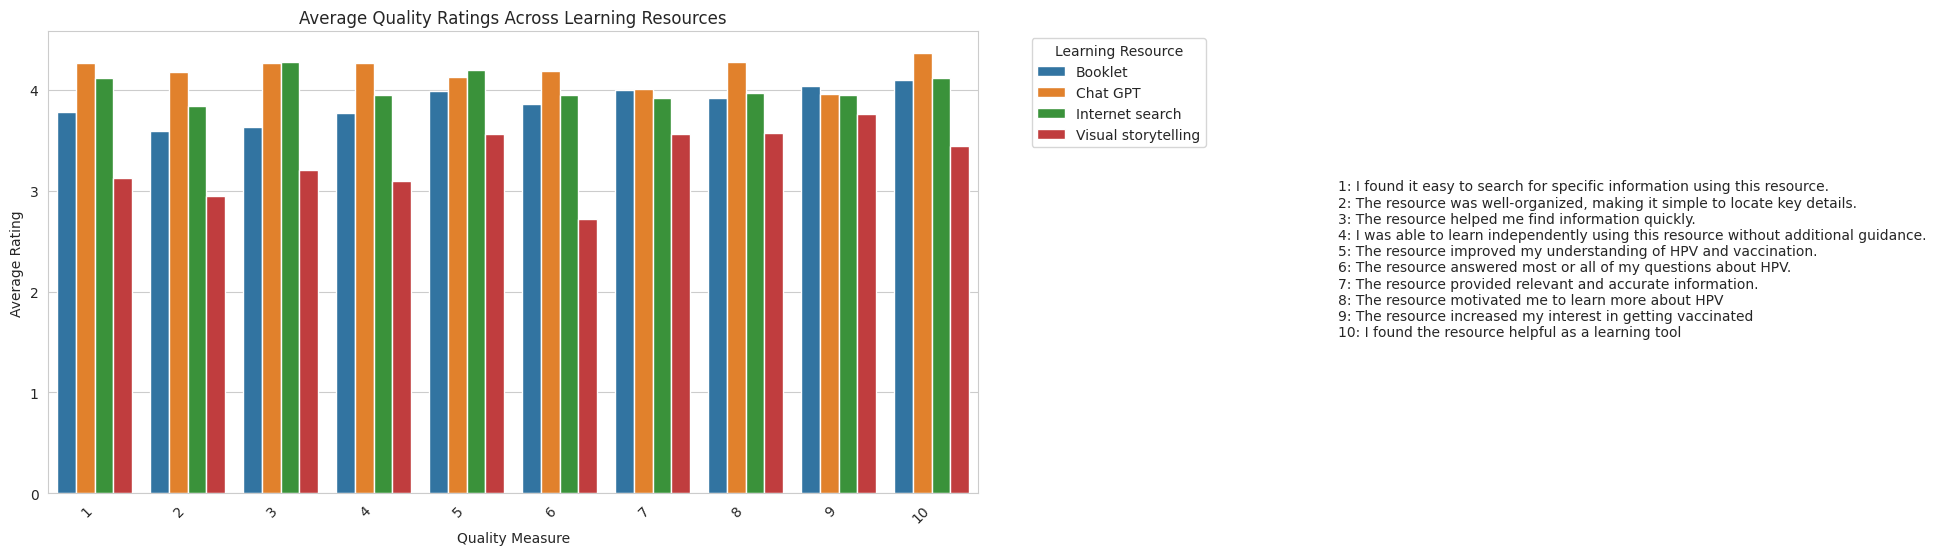

In [121]:
import seaborn as sns


# Trim extra spaces from column names
df_quality.columns = df_quality.columns.str.strip()

# Define the correct column for assigned learning resources
resource_column = "Which resources you have been assigned by your professor"

# Identify Likert-scale quality measure columns (excluding knowledge level columns)
excluded_columns = ["Email Address", "What were your knowledge level about HPV before today?"]  # Ignore knowledge level before
likert_columns = [col for col in df_quality.columns if col not in excluded_columns and col != resource_column]

# Convert Likert-scale columns to numeric values
df_quality[likert_columns] = df_quality[likert_columns].apply(pd.to_numeric, errors='coerce')

# Create a mapping of numeric labels to quality measures
quality_measure_mapping = {f"{i+1}": col for i, col in enumerate(likert_columns)}

# Rename the columns with numeric labels
df_avg_ratings = df_quality.groupby(resource_column)[likert_columns].mean().reset_index()
df_avg_ratings = df_avg_ratings.rename(columns={v: k for k, v in quality_measure_mapping.items()})

# Melt the data for visualization
df_avg_melted = df_avg_ratings.melt(id_vars=[resource_column],
                                    var_name="Quality Measure",
                                    value_name="Average Rating")

# Create a bar plot for average ratings
plt.figure(figsize=(12, 6))
sns.barplot(data=df_avg_melted,
            x="Quality Measure",
            y="Average Rating",
            hue=resource_column,
            ci=None)  # Remove confidence intervals for cleaner look

# Improve aesthetics
plt.xticks(rotation=45, ha="right")
plt.xlabel("Quality Measure")
plt.ylabel("Average Rating")
plt.title("Average Quality Ratings Across Learning Resources")
plt.legend(title="Learning Resource", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside

# Create a separate legend for the numeric labels
legend_text = "\n".join([f"{num}: {desc}" for num, desc in quality_measure_mapping.items()])
plt.figtext(1.2, 0.5, legend_text, fontsize=10, verticalalignment="center", bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

# Show plot
plt.show()